**Regression with dummy variables**

When x’s are not numeric but nominal, Each nominal or categorical variable is converted into dummy variables Dummy variables takes values 0 or 1\
Number of dummy variable for one x variable is equal to number of distinct values of that variable - 1

**Example**

A study was conducted by an IT company to develop a model to estimate sprint productivity of agile projects in telecom vertical. The explonatory variables chosen are developer skill, review type and code reuse. Data was collected from 34 projects and is given in Agile_Sprint_Productivity file.?

In [2]:
#Import the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols

In [3]:
#Import the dataset
data = pd.read_excel('Agile_Sprint_Productivity.xlsx')

In [4]:
#Explore the dataset
data.head()

,Developer_Skill,Review_Type,Reuse,Sprint_Productivty
0,2-Experienced,Peer,50,0.52
1,2-Experienced,Fagan,70,0.99
2,1-Fresher,Peer,25,0.35
3,1-Fresher,Peer,25,0.19
4,2-Experienced,Peer,50,0.57


In [5]:
#Copy features to new variables
dev_skill = data.Developer_Skill
rev_type = data.Review_Type
reuse = data.iloc[:,2]
sp = data.Sprint_Productivty

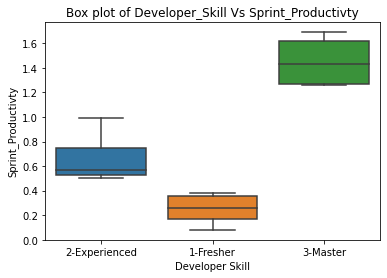

In [6]:
#Preliminary analysis - Box plot of Developer_Skill Vs Sprint_Productivty
sns.boxplot(x=dev_skill,y=sp)
plt.title('Box plot of Developer_Skill Vs Sprint_Productivty')
plt.xlabel('Developer Skill')
plt.ylabel('Sprint_Productivty')
plt.show()

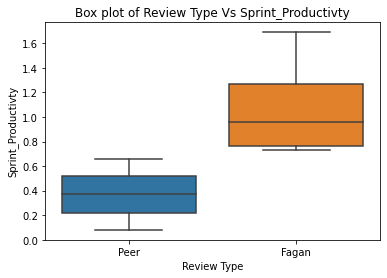

In [13]:
#Preliminary analysis - Box plot of Review Type Vs Sprint_Productivty
mysb.boxplot(x=rev_type,y=sp)
myplot.title('Box plot of Review Type Vs Sprint_Productivty')
myplot.xlabel('Review Type')
myplot.ylabel('Sprint_Productivty')
myplot.show()

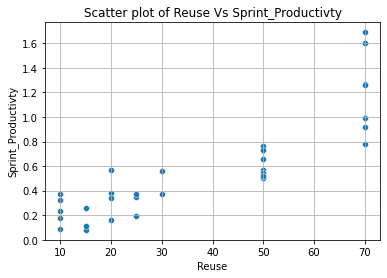

In [7]:
#Preliminary analysis - Scatter plot of Reuse Vs Sprint_Productivty
sns.scatterplot(x=reuse,y=sp)
plt.title('Scatter plot of Reuse Vs Sprint_Productivty')
plt.xlabel('Reuse')
plt.ylabel('Sprint_Productivty')
plt.grid()
plt.show()

It shows increasing trend. So, there is a positive correlation.

In [10]:
#Dummy variable regression model
model = ols('sp~C(rev_type)+C(dev_skill)+reuse',data=data).fit()

In [11]:
#Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sp   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.15e-16
Time:                        22:11:59   Log-Likelihood:                 28.424
No. Observations:                  34   AIC:                            -46.85
Df Residuals:                      29   BIC:                            -39.22
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.4055      0.103      3.939      0.000       0.195       0.616
C(rev_type)[T.Peer]              -0.2140      0.070     -3.038      0.005      -0.358      -0.070
C(dev_skill)[T.2-Experienced]     0.1989      0.080      2.471      0.020       0.034       0.363
C(dev_skill)[T.3-Master]          0.7999      0.125      6.424      0.000       0.545       1.055
reuse                             0.0036      0.002      1.494      0.146      -0.001       0.008
==============================================================================
Omnibus:                        0.957   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.817
Skew:                           0.037   Prob(JB):                        0.665
Kurtosis:                       2.244   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. P value <0.05: Model is significant
2. R2 and R2 adj above 90%. Model is accurate

In [12]:
#Predicted Values
Predicted = model.predict()

In [13]:
#Residuals
res = sp - Predicted

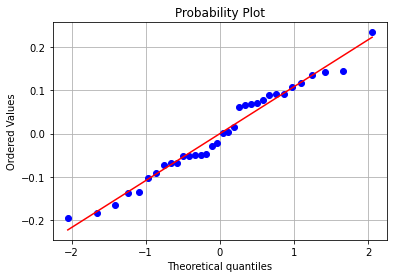

In [14]:
#Residual Analysis
stats.probplot(x=res,plot=plt)
plt.grid()
plt.show()

In [15]:
#Normality test of residuals
stats.normaltest(res)

NormaltestResult(statistic=0.9569212646763734, pvalue=0.6197366604763934)

p value >0.05. So, Residuals are normally distributed.

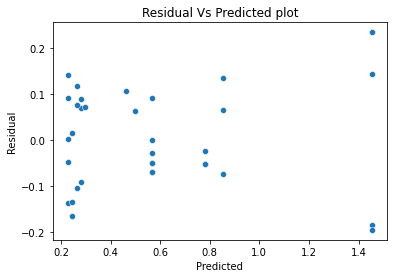

In [16]:
#Residual Vs Predicted plot
sns.scatterplot(x=Predicted,y=res)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Vs Predicted plot')
plt.show()

In [17]:
#Convert Predicted to Dataframe
Predicted = pd.DataFrame(Predicted,columns=['Predicted'])
#Combine predicted values with data
data = data.join(Predicted)

In [18]:
#Check final data
data.head()

,Developer_Skill,Review_Type,Reuse,Sprint_Productivty,Predicted
0,2-Experienced,Peer,50,0.52,0.568697
1,2-Experienced,Fagan,70,0.99,0.853988
2,1-Fresher,Peer,25,0.35,0.280669
3,1-Fresher,Peer,25,0.19,0.280669
4,2-Experienced,Peer,50,0.57,0.568697
